In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D

import tweepy
import time

In [17]:
import pickle
with open('df_users.pkl', 'rb') as f_math:
    df = pickle.load(f_math)

In [18]:
df.sample(5)

,id,K,following,follows
77,1018349496,1,398,1202302300770963457 1258259573074472960 339256...
33,186401848,0,368,4400245941 1215400703277125640 14987591 149991...
9,42156961,0,760,34743251 1227732768 370794213 51755600 1201633...
25,1353382832,0,511,84182215 1253013934635974657 10721741848040284...
34,150115389,0,355,991315059703009280 1253501090059952128 1236841...


# Analysis

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df['follows'],df['K'],train_size=0.8,random_state=5,stratify=df['K'])

In [20]:
colores_train=[]
for i in y_train:
    if i:
        colores_train.append('yellow')
    else:
        colores_train.append('b')

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

vect = TfidfVectorizer().fit(X_train)
X_train_tfidf=vect.transform(X_train)

svd = TruncatedSVD(50,random_state = 1) 
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_train_tfidf = lsa.fit_transform(X_train_tfidf)

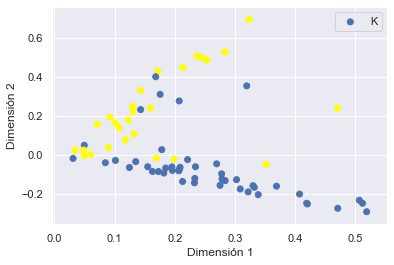

In [22]:
import matplotlib.patches as mpatches
plt.figure()
plt.scatter(X_train_tfidf[:, 0], X_train_tfidf[:, 1],c=colores_train)
plt.legend(['K','M'])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

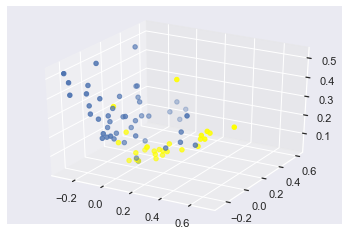

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z = X_train_tfidf[:, 0]
x = X_train_tfidf[:, 1]
y= X_train_tfidf[:, 2]

ax.scatter(x, y, z,c=colores_train)

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('model', MultinomialNB())])

In [26]:
parameters={'vect__min_df': [1,2,3,4]}

In [27]:
grid_search = GridSearchCV (pipeline, parameters,refit=True)
grid_search.fit(X_train, y_train);
predictions = grid_search.predict(X_test)

AUC:  0.9583333333333333


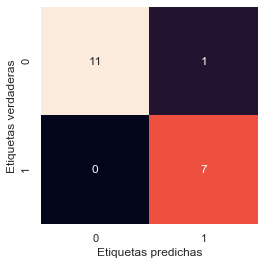

In [28]:
mat=confusion_matrix(y_test,predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df['K'].unique(), yticklabels=df['K'].unique())
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
print('AUC: ', roc_auc_score(y_test, predictions))

## Train & Test

In [14]:
X_test=vect.transform(X_test)
X_test_tfidf = lsa.fit_transform(X_test)

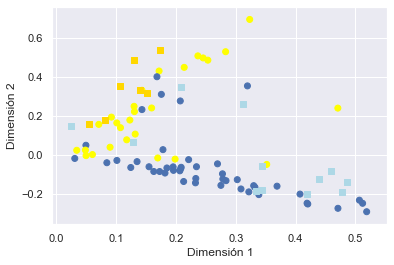

In [15]:
colores_test=[]
for i in y_test:
    if i:
        colores_test.append('gold')
    else:
        colores_test.append('lightblue')
plt.figure()

plt.scatter(X_train_tfidf[:, 0], X_train_tfidf[:, 1],c=colores_train,marker='o')
plt.scatter(X_test_tfidf[:, 0], X_test_tfidf[:, 1],c=colores_test,marker='s')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

# Users classifier

In [ ]:
run=False

In [ ]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
user='user_name'
user_info=api.get_user(user)
user_id=user_info.id_str

In [ ]:
if run:
    aux=[];data=[];

    for page in tweepy.Cursor(api.friends, user_id=user_id).pages():
        for j in page:
            aux.append(j.id_str)
        time.sleep(60)

    concat=''
    for i in aux:
        concat+=i
        concat+=' '

    if grid_search.predict(pd.Series(concat)):
        print(user,'es oficialista')
    else:
        print(user,'no es oficialista')